# 가설 설정 
성능이 영향을 미치는 원인을 분석한다

# 현상
Application 진입 시간이 늦어짐, 버벅임 발생

# 핵심 인자
Network IO 발생, File IO 발생, CPU 점유율 , Memory 부족, LMK 발생

# 예측 원인
Application의 비이상적인 Memory 점유, 잦은 파일IO, 화면 갱신에 따른 CPU연산 증가, 잦은 SYNC

In [14]:
# dataset 불러오기
import pandas as pd
import numpy as np
import matplotlib as plt
# jupyter에서 matplotlib의 결과를 아래 바로 보이게 하기 위해 %matplotlib inline을 입력합니다.
%matplotlib inline

# 다운로드 받은 데이터를 pandas의 dataframe형태로 읽어옵니다.
df = pd.read_csv("/media/ssd/projects/python/Aries/DataGenerator/performance.csv")

In [16]:
df.head(10)

,sreclaimable,level,cached,gpu_busy,timestamp_milli,vfps_ratio,adc_vts,memfree,app_launch_time,sunreclaim,adc_pa_therm0,adc_pa_therm1
0,66788,0,1062132,0,1466676483088,0,0,90540,0,133980,0,0
1,66788,0,1063056,0,1466676486268,0,0,82504,0,133960,0,0
2,66788,0,1063584,0,1466676486610,0,0,76508,0,133960,0,0
3,66788,56,1063584,0,1466676488282,0,323,76508,0,133960,0,0
4,66788,56,1063584,0,1466676488311,0,323,76508,0,133960,28,0
5,66788,56,1063584,0,1466676488337,0,323,76508,0,133960,28,29
6,66788,56,1063584,20,1466676488412,60,323,76508,0,133960,28,29
7,66788,56,1063584,20,1466676507940,60,327,76508,0,133960,28,29
8,66788,56,1063584,20,1466676507973,60,327,76508,0,133960,28,29
9,66788,56,1063584,20,1466676508001,60,327,76508,0,133960,28,30


In [15]:
df = df.set_index(['timestamp_milli'])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7f4ae23b6d50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4ae23b4d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4ae2397f10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4ae23978d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4ae23b6fd0>,
  <matplotlib.lines.Line2D at 0x7f4ae23b46d0>]}

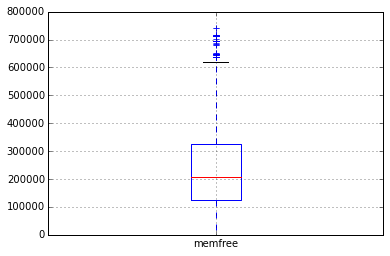

In [16]:
df.boxplot(column='memfree')#, by = 'Education')

In [17]:
data_list = ['memfree','app_launch_time']
# range normalization [x, y] ex) [0, 100]
y = 100
x = 0
range = y - x
# min, max normalization 
df_norm = (df - df.min()) / (df.max()-df.min())

# nomalize data
normalized_df = (df_norm * range) + x
normalized_df[data_list].plot(figsize=(40,10))
#df[data_list].plot(figsize=(40,10))

TypeError: Could not operate array(['android'], dtype=object) with block values index 1 is out of bounds for axis 1 with size 1

In [18]:
data_list = ['memfree','app_launch_time']
# range normalization [x, y] ex) [0, 100]
y = 100
x = 0
range = y - x
# min, max normalization 
df_norm = (df - df.min()) / (df.max()-df.min())

# nomalize data
normalized_df = (df_norm * range) + x
normalized_df[data_list].plot(figsize=(40,10))
#df[data_list].plot(figsize=(40,10))

TypeError: Could not operate array(['android'], dtype=object) with block values index 1 is out of bounds for axis 1 with size 1

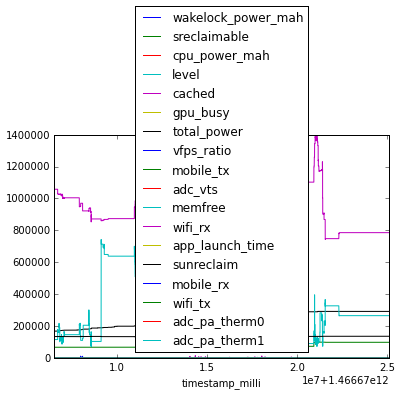

In [19]:
df.plot()

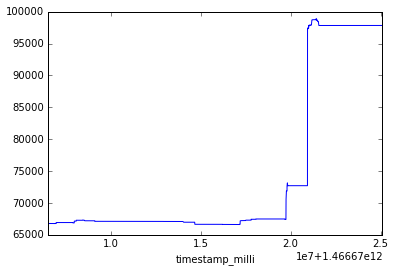

In [314]:
df['sreclaimable'].plot()

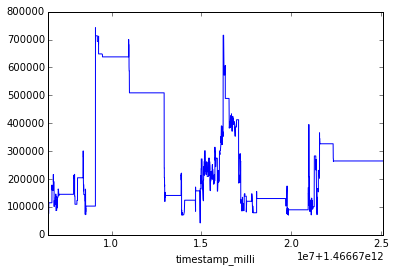

In [315]:
df['memfree'].plot()

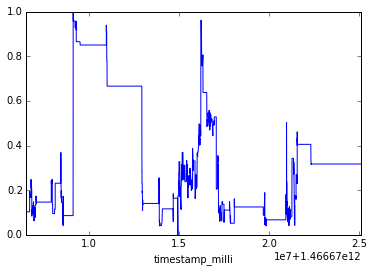

In [316]:
# min, max normalization 
df_norm = (df - df.min()) / (df.max()-df.min())
df_norm['memfree'].plot()

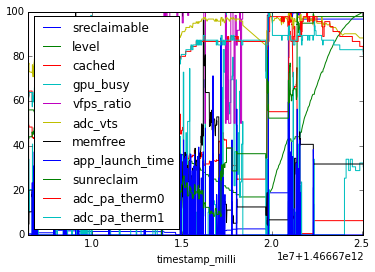

In [317]:
# range normalization [x, y] ex) [0, 100]
y = 100
x = 0
range = y - x
normalized_df = (df_norm * range) + x
normalized_df.plot()

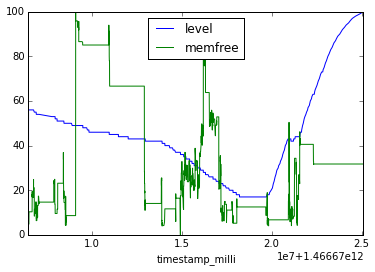

In [320]:
normalized_df[['level','memfree']].plot()

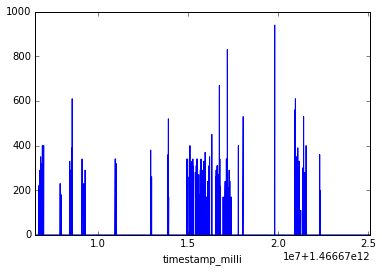

In [337]:
df['app_launch_time'].plot()

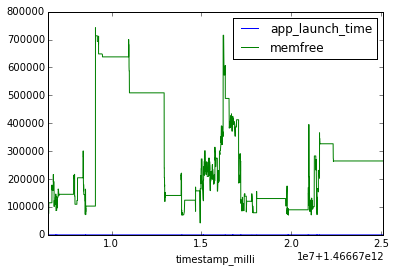

In [222]:
df[['app_launch_time', 'memfree']].plot()

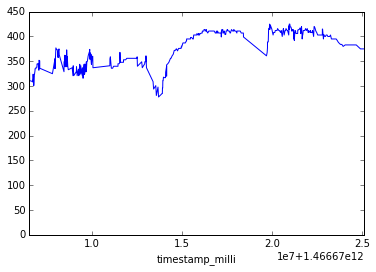

In [256]:
df['adc_vts'].plot()

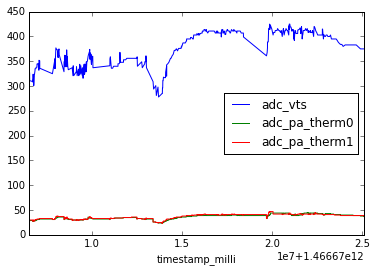

In [259]:
df[['adc_vts','adc_pa_therm0','adc_pa_therm1']].plot()

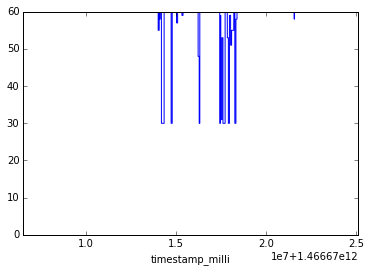

In [260]:
df['vfps_ratio'].plot()

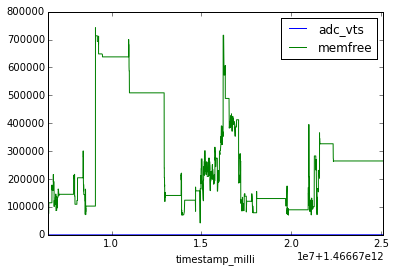

In [225]:
df[['adc_vts', 'memfree']].plot()

In [106]:
# z-score normalization
df_norm = (df-df.mean())/df.std()

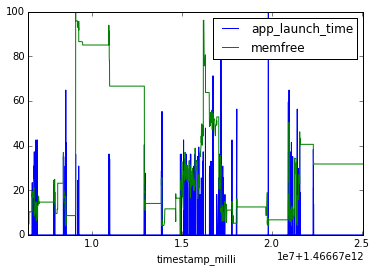

In [236]:
normalized_df[['app_launch_time','memfree']].plot()

In [65]:
alt_df = df[df['app_launch_time']!=0]['app_launch_time']

In [66]:
alt_df_norm = (alt_df-alt_df.mean())/(alt_df.max()-alt_df.min()).mean()

In [69]:
df_norm['app_launch_time'] = alt_df_norm

In [98]:
max = df['app_launch_time'].max()
min = df['app_launch_time'].min()
avg = df[df['app_launch_time']!=0]['app_launch_time'].mean()
std = df[df['app_launch_time']!=0]['app_launch_time'].std()

In [99]:
print max, min , avg, std

940 0 279.230769231 122.357789174


In [87]:
df_norm['app_launch_time'] = (df-avg)/(max-min).mean()

In [96]:
df.describe()

,sreclaimable,cached,memfree,app_launch_time,sunreclaim
count,622.000000,6.220000e+02,622.000000,622.000000,622.000000
mean,72193.942122,1.040715e+06,240355.614148,75.868167,133629.819936
std,11524.816847,1.541519e+05,145947.495815,139.656129,772.922000
min,66628.000000,7.441600e+05,42720.000000,0.000000,132616.000000
25%,66656.000000,9.563500e+05,123851.000000,0.000000,133118.000000
50%,66784.000000,9.756660e+05,208680.000000,0.000000,133280.000000
75%,67308.000000,1.076651e+06,334388.000000,150.000000,134132.000000
max,98908.000000,1.393192e+06,742540.000000,940.000000,135728.000000


In [107]:
df_norm['app_launch_time'] = (df['app_launch_time'] - avg) / std

In [108]:
df_norm.head(10)

,sreclaimable,cached,memfree,app_launch_time,sunreclaim
timestamp_milli,,,,,
1466676483088,-0.469070,0.138936,-1.026503,-2.282084,0.453060
1466676486268,-0.469070,0.144930,-1.081564,-2.282084,0.427184
1466676486610,-0.469070,0.148355,-1.122648,-2.282084,0.427184
1466676509657,-0.469417,0.110833,-0.858087,-2.282084,0.458235
1466676687959,-0.469417,-0.066628,-0.421190,-2.282084,0.546213
1466676691174,-0.469417,-0.061153,-0.497793,-2.282084,0.515162
1466676691953,-0.469417,-0.057780,-0.538547,-2.282084,0.535863
1466676694558,-0.469417,-0.057780,-0.538547,-0.484078,0.535863
1466676694622,-0.469417,-0.064267,-0.480115,-2.282084,0.535863


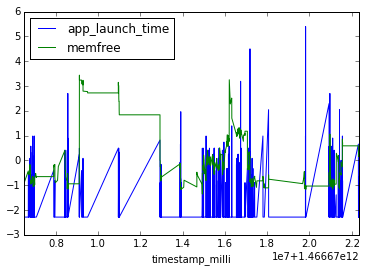

In [142]:
df_norm[['app_launch_time','memfree']].plot()

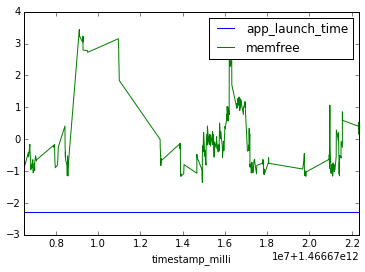

In [144]:
df_norm[df_norm['app_launch_time']+2.282084 < 0.0001][['app_launch_time','memfree']].plot()

In [324]:
df_norm.head(3)

,sreclaimable,level,cached,gpu_busy,vfps_ratio,adc_vts,memfree,app_launch_time,sunreclaim,adc_pa_therm0,adc_pa_therm1
timestamp_milli,,,,,,,,,,,
1466676483088,0.004957,0.0,0.489917,0.0,0.0,0.0,0.068332,0.0,0.438303,0.0,0.0
1466676486268,0.004957,0.0,0.491341,0.0,0.0,0.0,0.056849,0.0,0.431877,0.0,0.0
1466676486610,0.004957,0.0,0.492154,0.0,0.0,0.0,0.048281,0.0,0.431877,0.0,0.0


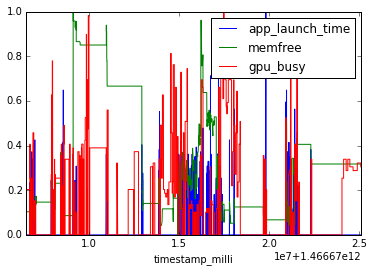

In [336]:
df_norm[['app_launch_time','memfree', 'gpu_busy']].plot()

In [360]:
print (df['app_launch_time'] / 1000).describe()
print df['app_launch_time'].describe()

count    2126.000000
mean        0.022197
std         0.083016
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.940000
Name: app_launch_time, dtype: float64
count    2126.000000
mean       22.196613
std        83.015638
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       940.000000
Name: app_launch_time, dtype: float64


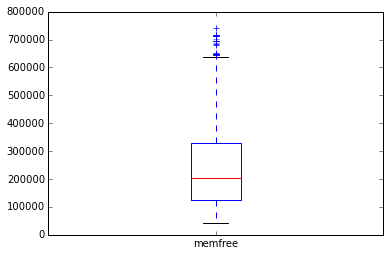

In [363]:
df['memfree'].plot(kind='box')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7fe7558f4c10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe755b4f4d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe755b62110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe755b4fcd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe7558a8a90>,
  <matplotlib.lines.Line2D at 0x7fe7558f4a50>]}

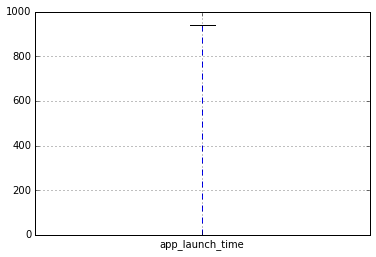

In [362]:
df.boxplot(column='app_launch_time')#, by = 'Education')

In [298]:
def correlation_matrix(df):
    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    # plt.title('Abalone Feature Correlation')
    labels= df.columns.tolist() #['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(labels,fontsize=7)
    ax1.set_yticklabels(labels,fontsize=7)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    cbar = fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

# correlation_matrix(df)

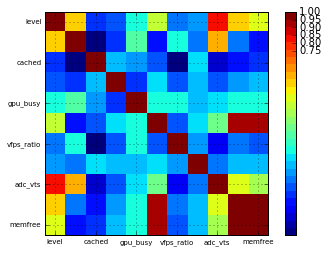

In [321]:
correlation_matrix(normalized_df)

In [322]:
normalized_df.corr()

,sreclaimable,level,cached,gpu_busy,vfps_ratio,adc_vts,memfree,app_launch_time,sunreclaim,adc_pa_therm0,adc_pa_therm1
sreclaimable,1.000000,0.537823,-0.174150,-0.134440,0.102726,0.398646,-0.097300,-0.043140,0.845566,0.536495,0.438692
level,0.537823,1.000000,-0.397907,-0.193003,0.191305,-0.243330,0.113627,-0.091109,0.606598,-0.069665,-0.208833
cached,-0.174150,-0.397907,1.000000,0.002450,-0.035096,-0.121625,-0.442789,0.062083,-0.336834,-0.243149,-0.154906
gpu_busy,-0.134440,-0.193003,0.002450,1.000000,-0.180877,0.070428,-0.107428,0.012333,-0.124528,-0.044727,0.036393
vfps_ratio,0.102726,0.191305,-0.035096,-0.180877,1.000000,0.089071,0.086405,0.034363,0.071162,0.116260,0.120654
adc_vts,0.398646,-0.243330,-0.121625,0.070428,0.089071,1.000000,-0.123867,0.059376,0.278560,0.925516,0.949730
memfree,-0.097300,0.113627,-0.442789,-0.107428,0.086405,-0.123867,1.000000,-0.020707,-0.270651,-0.093571,-0.125415
app_launch_time,-0.043140,-0.091109,0.062083,0.012333,0.034363,0.059376,-0.020707,1.000000,-0.074001,0.000777,0.036935
sunreclaim,0.845566,0.606598,-0.336834,-0.124528,0.071162,0.278560,-0.270651,-0.074001,1.000000,0.455556,0.347151
adc_pa_therm0,0.536495,-0.069665,-0.243149,-0.044727,0.116260,0.925516,-0.093571,0.000777,0.455556,1.000000,0.952507


In [304]:
normalized_df['vfps_ratio'].head(10)

timestamp_milli
1466676483088      0.0
1466676486268      0.0
1466676486610      0.0
1466676488282      0.0
1466676488311      0.0
1466676488337      0.0
1466676488412    100.0
1466676507940    100.0
1466676507973    100.0
1466676508001    100.0
Name: vfps_ratio, dtype: float64

In [307]:
df['vfps_ratio'].head(70)

timestamp_milli
1466676483088     0
1466676486268     0
1466676486610     0
1466676488282     0
1466676488311     0
1466676488337     0
1466676488412    60
1466676507940    60
1466676507973    60
1466676508001    60
1466676508069    60
1466676509657    60
1466676514105    60
1466676514132    60
1466676514164    60
1466676514248    60
1466676686107    60
1466676686139    60
1466676686166    60
1466676686241    60
1466676687959    60
1466676691086    60
1466676691152    60
1466676691174    60
1466676691196    60
1466676691279    60
1466676691953    60
1466676694558    60
1466676694622    60
1466676700786    60
                 ..
1466676714362    60
1466676714468    60
1466676728776    60
1466676728802    60
1466676728826    60
1466676728904    60
1466676739700    60
1466676739732    60
1466676739771    60
1466676739845    60
1466676761860    60
1466676761890    60
1466676761919    60
1466676761995    60
1466676764157    60
1466676764221    60
1466676765847    60
1466676765925    60
1466